<img src="./logo_UTN_3.svg" align="right" width="200" /> 

### Teoría de los Circuitos 2

# Trabajo semanal 4
### Axel Nathanel Nahum


## Introduccion

En este notebook encontraremos el diseño deun filtro $Pasa-Altos$ apartir de una platnilla dada. Para lograr esto, partiremos de un filtro $Pasa-Bajos$, el cual transformaermos mediante un $nucleo$ $de$ $transformacion$, para asi lograr nuestra transferencia deseada, es decir, la de un $Pasa-Altos$.

## Resolucion

### Resolucion original

In [7]:
from IPython.display import IFrame
IFrame("./Resolucion_4.pdf", width=900, height=1000)

In [2]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías

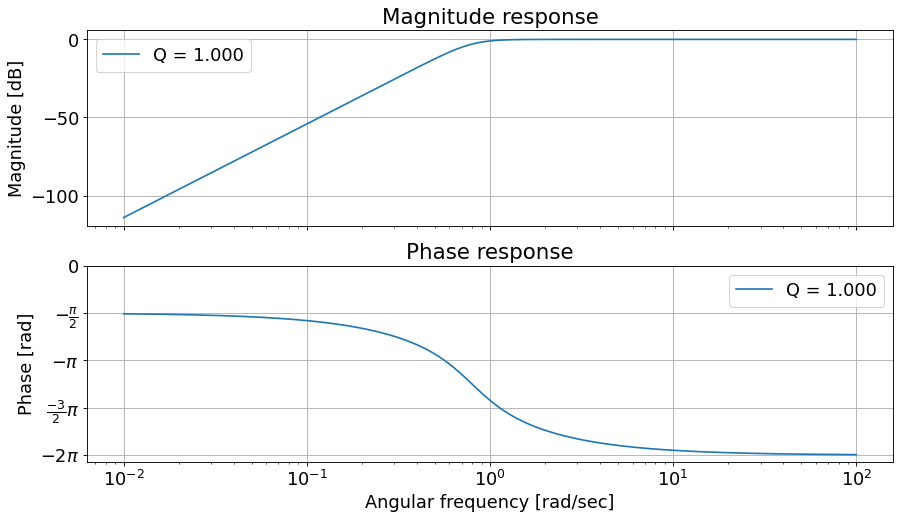

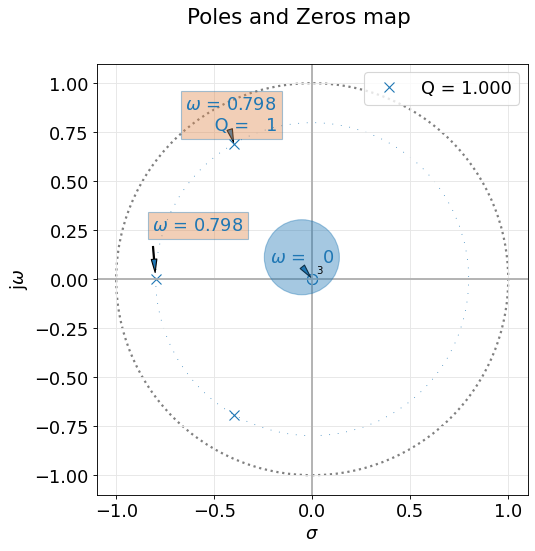

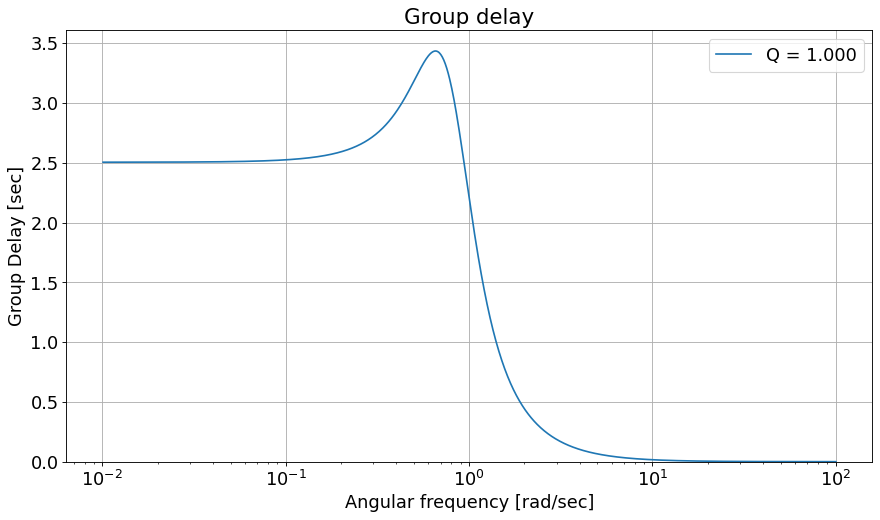

In [6]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys

wp = 2 * np.pi * 40000
ws = 2 * np.pi * 10000
Ωws = ws/wp

# Orden del filtro
nn = 3

αmax = 1
e = np.sqrt(10**(αmax/10) - 1) # "epsilon"
Ωwb = wp * e**(+1/nn)

for n in range (1 , 9):
 αminn = 10 * np.log10(1 + (e**2 * Ωws**(2*n)))
# print(αminn)

qq = 1/(2 * np.cos(np.pi/3))

Z,P,K = sig.buttap(3)
Num,Den = sig.zpk2tf(Z,P,K)
Num_mp,Den_mp = sig.lp2hp(Num,Den,e**(+1/nn))

TF = TransferFunction(Num_mp, Den_mp)

analyze_sys(TF, sys_name='Q = {:3.3f}'.format(qq))

En estos graficos podremos observar y analizar la $respuesta$ $en$ $frecuencia$ $normalizada$ en un $\omega_0$ de $0.7983$ (este valor corresponde a hacer $ε^{(+1/n)}$, siendo n = 3. Esto debido a que se trata de un filtro $Pasa-Altos$), ademas de observar los polos y ceros de la transferencia calculada previamente. En este caso se observa un filtro $Pasa-Altos$ de maxima planicidad con polos ubicados en $0$ y $\frac{\pi}{3}$ ($Angulos$ en donde se encuentran los polos. Los valores se pueden hayar a partir del $\omega_0$ y del angulo, usando las funciones trigonometricas del coseno y seno) y un $cero$ $triple$ en el origen.

$La$ $transferencia$ $asociada$ $a$ $estos$ $graficos$ $es:$

$$ T(s) = \frac{V_2}{V_1} = \frac{S^2}{s^2 + s. \frac{\omega_0}{Q} + \omega_0^2} * \frac{S}{s + \omega_0}$$

$Donde:$

* $\omega_0 = 0.7983$ y $Q = 1$. Esto es corresponde a una $transferencia$ $normalizada$.

En esta se puede observar claramente dos filtros $Pasa-Altos$ en $cascada$, uno de primer orden y otro de segundo orden. Esta transferencia se encuentra normalizada en $w_0 = 0.7983$ pero se podria desnormalizar teniendo en cuenta otra S distinta. Esta seria igual a $\frac{Sn}{Ω\omega}$, donde Sn (domino de S normalizado) y Ω$\omega$ (norma de normalizacion de frecuencia). 

$Esta$ $nueva$ $transferencia$ $quedaria:$

$$ T(s) = \frac{V_2}{V_1} = \frac{S^2}{s^2 + s. \frac{Ω\omega_0}{Q} + Ω\omega_0^2} * \frac{S}{s + Ω\omega_0}$$

$Donde:$

* $Ω\omega_0 = 2 * \pi * 40000Hz * e^\frac{1}{3}$
* $e^\frac{1}{3} = 0.7983$

Esta ultima sera representada por el grafico proximo de LTspice.

## Circuito LTspice

<img src="./Circuito_4.PNG" align="middle" width="1050" /> 

## Respuesta en frecuencia LTspice

<img src="./Respuesta_Frecuencia_4.PNG" align="middle" width="1000" /> 


## Plantilla

<img src="./Plantilla_4.PNG" align="center" width="300" /> 

El el grafico de LTspice se observa la $respuesta$ $en$ $frecuencia$ $de$ $un$ $filtro$ $pasa-altos$ de $maxima$ $planicidad$ calculado previamente. En este se puede ver como se verifica que a $10KHz$, la $atenuacion$ es de $30$ $dB$ aproximadamente. Aca se verifica lo pedido por la plantilla. A su vez, tambien se verifica lo calculado en los $PDFS$. Ademas, en una frecuencia de aproximadamente $40KHz$, la atenuacion es de $1 dB$, cumpliendose aproximadamente lo pedido por la $plantilla$. Ademas se observa claramente como la fase empieza en -90 y termina en -360, corfimando lo analizado anteriormente con los graficos de Python.